# 03 - Reshaping Data
The last example showed a very awkward way to select some data from a long table. Now, we figure out a better way.

## Scope
- Read `csv` file (with data for all countries) into pandas data frame.
- Reshaping the original `Dataframe` to fit our needs, i.e. creating columns for all countries.
- Selecting countries and ploting data.

## Sources
- [10 minutes to pandas — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)
- [pandas.Index — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.html)
- [Indexing and selecting data — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.IndexSlice.html)

In [1]:
# Preparations for using pandas library and this notebook
import pandas as pd
%matplotlib inline

In [2]:
# Reading data into a pandas data frame, some cleaning up
data_source = 'ourworldindata.org'
file_id = 'life-expectancy.csv'
life_expectancy = pd.read_csv(file_id)
life_expectancy.drop(columns=['Code'], inplace=True)	# Unused column
life_expectancy.rename(columns={'Entity': 'Country'}, inplace=True)
life_expectancy.head()

,Country,Year,Life expectancy (years)
0,Afghanistan,1950,27.638
1,Afghanistan,1951,27.878
2,Afghanistan,1952,28.361
3,Afghanistan,1953,28.852
4,Afghanistan,1954,29.350


In [3]:
# Reshaping data
life_expectancy_pivot = life_expectancy.pivot(index='Year', columns='Country', values='Life expectancy (years)')
life_expectancy_pivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Americas,Andorra,Angola,Anguilla,Antigua and Barbuda,...,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,World,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,63.377,61.607,78.025,76.090,73.588,76.442865,83.073,59.398,81.332,76.483,...,69.869,74.344,72.584,75.110,79.300,69.213,71.661,66.085,61.737,59.534
2016,63.763,62.064,78.194,76.298,73.609,76.537039,83.274,59.925,81.441,76.617,...,70.021,74.551,72.405,75.172,79.454,69.496,71.928,66.087,62.464,60.294
2017,64.130,62.472,78.333,76.499,73.636,76.629931,83.443,60.379,81.568,76.752,...,70.172,74.749,72.246,75.241,79.605,69.762,72.169,66.086,63.043,60.812


### Questions
- What is `NaN`? Have a look in `pandas` and `numpy` documentation!

In [4]:
all_countries = life_expectancy_pivot.columns
all_countries

Index(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Americas', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       ...
       'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam', 'Wallis and Futuna',
       'Western Sahara', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=243)

In [5]:
country_list = ['Africa', 'World', 'Germany']

In [6]:
some_countries = life_expectancy_pivot[country_list]
some_countries.tail()

Country,Africa,World,Germany
Year,,,
2015,61.607,71.661,80.770
2016,62.064,71.928,80.902
2017,62.472,72.169,81.039
2018,62.839,72.386,81.180
2019,63.170,72.584,81.326


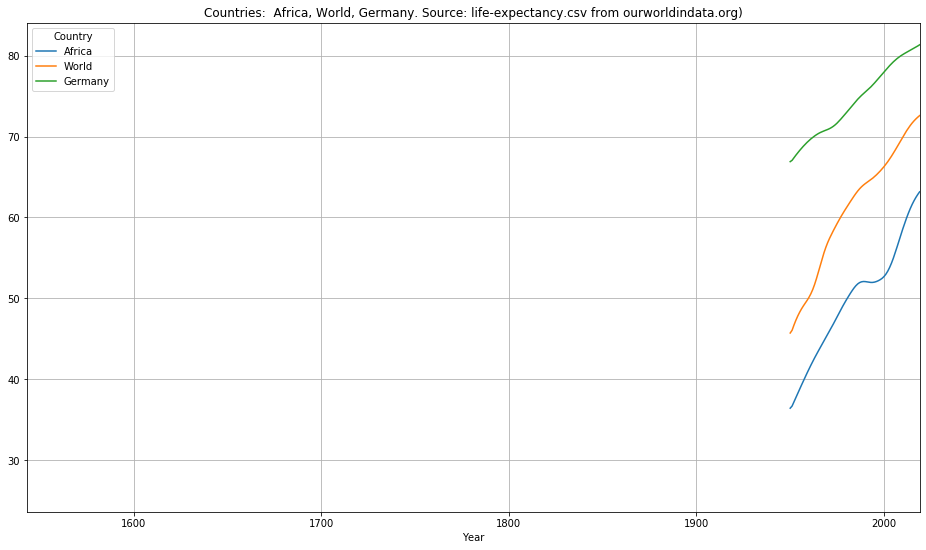

In [16]:
country_string = ', '.join(country_list)    # List in nicer form
plot_title = f'Countries:  {country_string}. Source: {file_id} from {data_source})'
some_countries.plot(title=plot_title, grid=True, figsize=(16, 9));

### Questions
- How to get rid of the empty part of the `some_countries` plot ([`NaN`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html))?
- How to find a certain country [without knowing the exact name](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html)?
- What does the `;` at the end of a cell do?